In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

le = preprocessing.LabelEncoder()

In [2]:
#loading the train and test dataset
train_df = pd.read_csv("KDDTrain+.txt")
#train_df

test_df = pd.read_csv("KDDTest+.txt")
#test_df

In [3]:
df = pd.concat([train_df,test_df])
#df.to_csv("test.csv")
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,severity_score
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [4]:
#Drop severity score column
df = df.drop(['severity_score'], axis = 1)

#assigning the numerical values to class  

new_df=df['class']

                                 
frame=new_df.replace({ 'normal' : 0, 'apache2': 1,'back':1, 'land': 1, 'neptune': 1, 
                                         'mailbomb': 1, 'pod': 1, 'processtable': 1, 'smurf': 1, 
                                         'teardrop': 1,'udpstorm': 1, 'worm': 1,'ipsweep' : 2,
                                         'mscan' : 2, 'nmap' : 2, 'portsweep' : 2,'satan' : 2,
                                         'saint' : 2, 'ftp_write': 3,'guess_passwd': 3,'imap': 3,
                                         'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3, 'warezmaster': 3,
                            'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3, 'xlock': 3,
                            'xsnoop': 3,'httptunnel': 3,'buffer_overflow': 4,'loadmodule': 4,'perl': 4,
                            'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})

frame



0        0
1        0
2        1
3        0
4        0
        ..
22539    0
22540    0
22541    1
22542    0
22543    2
Name: class, Length: 148517, dtype: int64

In [5]:
df['class'] = frame
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,0
22540,0,tcp,http,SF,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,0
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,1
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0


In [6]:
#converting the categorical values into numerical values - protocol_type, service and flag 

df.protocol_type = le.fit_transform(df.protocol_type)
df.service = le.fit_transform(df.service)
df.flag = le.fit_transform(df.flag)

df.protocol_type = df.protocol_type.astype('category')
df.service = df.service.astype('category')
df.flag = df.flag.astype('category')

df.describe(include='all')

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
count,148517.000000,148517.0,148517.0,148517.0,1.485170e+05,1.485170e+05,148517.000000,148517.000000,148517.000000,148517.000000,...,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000
unique,NaN,3.0,70.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,1.0,24.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,121569.0,48191.0,89820.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,276.779305,NaN,NaN,NaN,4.022795e+04,1.708885e+04,0.000215,0.020523,0.000202,0.189379,...,119.462661,0.534521,0.084103,0.145932,0.030584,0.256122,0.251304,0.136220,0.136397,0.630615
std,2460.683131,NaN,NaN,NaN,5.409612e+06,3.703525e+06,0.014677,0.240069,0.019417,2.013160,...,111.232318,0.448061,0.194102,0.308638,0.108975,0.428500,0.429719,0.322741,0.335282,0.767383
min,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,NaN,NaN,NaN,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,72.000000,0.600000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,NaN,NaN,NaN,2.780000e+02,5.710000e+02,0.000000,0.000000,0.000000,0.000000,...,255.000000,1.000000,0.070000,0.050000,0.010000,0.600000,0.500000,0.000000,0.000000,1.000000


In [7]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,20,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,2,44,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,1,49,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,1,24,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,1,24,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,1,54,9,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,0
22540,0,1,24,9,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,0
22541,0,1,24,9,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,1
22542,0,2,12,9,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0


In [8]:
X = df.drop(['class'], axis = 1)
Y = df['class']

In [9]:
X

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,20,9,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,44,9,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,1,49,5,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,1,24,9,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,1,24,9,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,1,54,9,794,333,0,0,0,0,...,100,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00
22540,0,1,24,9,317,938,0,0,0,0,...,197,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00
22541,0,1,24,9,54540,8314,0,0,0,2,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07
22542,0,2,12,9,42,42,0,0,0,0,...,255,252,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00


In [10]:
Y

0        0
1        0
2        1
3        0
4        0
        ..
22539    0
22540    0
22541    1
22542    0
22543    2
Name: class, Length: 148517, dtype: int64

In [11]:
#Spliting the KDDTrain+ csv file itself into train and test data


from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0) # 80% training and 20% test

In [12]:
print('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (103961, 41) (103961,)
Test set: (44556, 41) (44556,)


In [13]:
X_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
7628,0,1,24,9,306,246,0,0,0,0,...,9,255,1.00,0.00,0.11,0.01,0.00,0.00,0.0,0.0
57620,0,1,24,9,203,707,0,0,0,0,...,8,247,1.00,0.00,0.12,0.02,0.00,0.00,0.0,0.0
31798,0,1,24,9,231,3357,0,0,0,0,...,203,255,1.00,0.00,0.00,0.02,0.00,0.00,0.0,0.0
21399,0,1,54,5,0,0,0,0,0,0,...,255,23,0.09,0.62,0.01,0.00,0.00,0.04,0.0,0.0
63539,6,1,60,9,176,3846,0,0,0,0,...,214,22,0.10,0.02,0.00,0.00,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41993,0,1,66,5,0,0,0,0,0,0,...,255,19,0.07,0.04,0.00,0.00,1.00,1.00,0.0,0.0
97639,0,1,24,9,296,313,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
95939,0,1,20,5,0,0,0,0,0,0,...,255,5,0.02,0.07,0.00,0.00,1.00,1.00,0.0,0.0
117952,0,1,24,9,293,5017,0,0,0,0,...,20,255,1.00,0.00,0.05,0.07,0.00,0.00,0.0,0.0


In [14]:
X_training=X[:125973]
#X_training
X_testing = X[125973:]
#X_testing
Y_training = Y[:125973]
#Y_training
Y_testing = Y[125973:]
#Y_testing


In [1]:
print('Train set:', X_training.shape,  Y_training.shape)
print ('Test set:', X_testing.shape,  Y_testing.shape)

NameError: name 'X_training' is not defined

## Variance Threshold

In [16]:
### It will remove zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_training)

VarianceThreshold(threshold=0)

In [17]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [18]:
### Finding non constant features
sum(var_thres.get_support())

40

In [19]:
constant_columns = [column for column in X_training.columns
                    if column not in X_training.columns[var_thres.get_support()]]

print(len(constant_columns))

1


In [20]:
for feature in constant_columns:
     print(feature)

num_outbound_cmds


In [21]:
X_training_vth=X_training.drop(constant_columns,axis=1)
X_training_vth

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,20,9,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,44,9,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,1,49,5,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,1,24,9,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,1,24,9,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,1,49,5,0,0,0,0,0,0,...,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00
125969,8,2,49,9,105,145,0,0,0,0,...,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00
125970,0,1,54,9,2231,384,0,0,0,0,...,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00
125971,0,1,30,5,0,0,0,0,0,0,...,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00


In [22]:
X_testing_vth=X_testing.drop(constant_columns,axis=1)
X_testing_vth

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,49,1,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00
1,0,1,49,1,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00
2,2,1,20,9,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00
3,0,0,14,9,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00
4,1,1,60,2,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,1,54,9,794,333,0,0,0,0,...,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00
22540,0,1,24,9,317,938,0,0,0,0,...,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00
22541,0,1,24,9,54540,8314,0,0,0,2,...,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07
22542,0,2,12,9,42,42,0,0,0,0,...,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00


## Mutual Information

In [23]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_training_vth,Y_training)
mutual_info

array([0.05481799, 0.09613248, 0.59746397, 0.5031951 , 0.71672104,
       0.45907752, 0.        , 0.00935941, 0.        , 0.0235584 ,
       0.00499081, 0.31088453, 0.00646026, 0.00087394, 0.00080013,
       0.00118599, 0.00274252, 0.        , 0.00257971, 0.00186338,
       0.01170795, 0.41261525, 0.16218285, 0.3838664 , 0.35915557,
       0.07386241, 0.05197337, 0.46477479, 0.50643199, 0.14338929,
       0.21090185, 0.41714119, 0.40417077, 0.45074795, 0.23455849,
       0.26162325, 0.39964718, 0.37451159, 0.09801168, 0.08457317])

In [24]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_training_vth.columns
mutual_info.sort_values(ascending=False)

src_bytes                      0.716721
service                        0.597464
diff_srv_rate                  0.506432
flag                           0.503195
same_srv_rate                  0.464775
dst_bytes                      0.459078
dst_host_diff_srv_rate         0.450748
dst_host_srv_count             0.417141
count                          0.412615
dst_host_same_srv_rate         0.404171
dst_host_serror_rate           0.399647
serror_rate                    0.383866
dst_host_srv_serror_rate       0.374512
srv_serror_rate                0.359156
logged_in                      0.310885
dst_host_srv_diff_host_rate    0.261623
dst_host_same_src_port_rate    0.234558
dst_host_count                 0.210902
srv_count                      0.162183
srv_diff_host_rate             0.143389
dst_host_rerror_rate           0.098012
protocol_type                  0.096132
dst_host_srv_rerror_rate       0.084573
rerror_rate                    0.073862
duration                       0.054818


<AxesSubplot:>

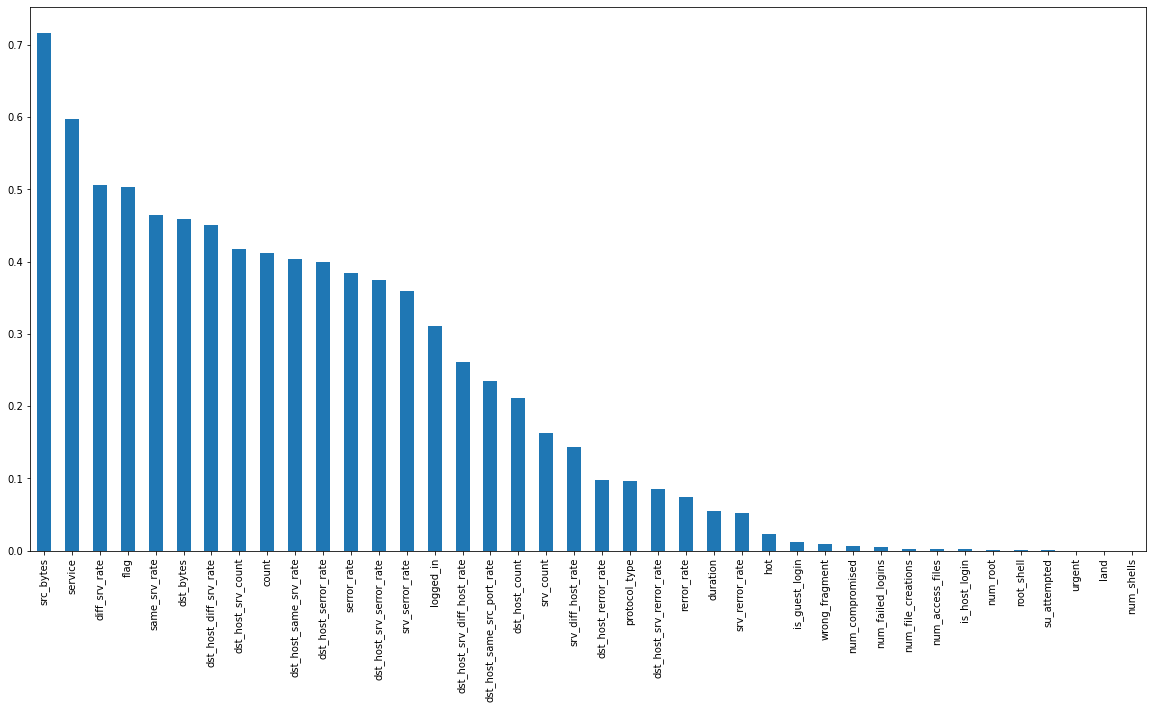

In [25]:
#plotting the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 10))

In [26]:
from sklearn.feature_selection import SelectKBest

In [27]:
#No we Will select the  top 30 important features
sel_cols = SelectKBest(mutual_info_classif, k=30)
sel_cols.fit(X_training_vth, Y_training)
imp_cols=X_training_vth.columns[sel_cols.get_support()]

In [28]:
imp_cols

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'hot', 'logged_in', 'num_compromised',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

In [29]:
X_training_minfo=X_training_vth[imp_cols]

In [30]:
X_training_minfo

,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,hot,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,20,9,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,44,9,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,1,49,5,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,1,24,9,232,8153,0,0,1,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,1,24,9,199,420,0,0,1,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,1,49,5,0,0,0,0,0,0,...,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00
125969,8,2,49,9,105,145,0,0,0,0,...,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00
125970,0,1,54,9,2231,384,0,0,1,0,...,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00
125971,0,1,30,5,0,0,0,0,0,0,...,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00


In [31]:
X_testing_minfo=X_testing_vth[imp_cols]

In [32]:
X_testing_minfo

,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,hot,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,49,1,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00
1,0,1,49,1,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00
2,2,1,20,9,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00
3,0,0,14,9,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00
4,1,1,60,2,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,1,54,9,794,333,0,0,1,0,...,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00
22540,0,1,24,9,317,938,0,0,1,0,...,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00
22541,0,1,24,9,54540,8314,0,2,1,1,...,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07
22542,0,2,12,9,42,42,0,0,0,0,...,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00


## Decision tree after Mutual Info and variance Threshold


In [69]:
from sklearn import tree
from sklearn import metrics

In [70]:
clf_Tree_mInfo = tree.DecisionTreeClassifier()

In [71]:
clf_Tree_mInfo.fit(X_training_minfo,Y_training)

DecisionTreeClassifier()

In [72]:
Y_pred_Tree_minfo=clf_Tree_mInfo.predict(X_testing_minfo)

In [73]:
df_tree_minfo = pd.DataFrame({'Actual': Y_testing, 'Predicted': Y_pred_Tree_minfo})

In [74]:
#df_tree_minfo.head(20)

In [75]:
metrics.mean_absolute_error(Y_testing,Y_pred_Tree_minfo)

0.4715223562810504

In [76]:
metrics.accuracy_score(Y_testing,Y_pred_Tree_minfo)

0.7729329311568488

In [77]:
metrics.precision_recall_fscore_support(Y_testing,Y_pred_Tree_minfo, average='weighted')

(0.8108927499430025, 0.7729329311568488, 0.7366726946368723, None)

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
#clf_random = RandomForestClassifier(max_depth=20, random_state=0)
clf_random_minfo = RandomForestClassifier(max_depth = 25,random_state=0)

In [44]:
clf_random_minfo.fit(X_training_minfo,Y_training)

RandomForestClassifier(max_depth=25, random_state=0)

In [45]:
Y_pred_random_minfo=clf_random_minfo.predict(X_testing_minfo)

In [46]:
random_df = pd.DataFrame({'Actual': Y_testing, 'Predicted': Y_pred_random_minfo})

In [47]:
#random_df

In [48]:
metrics.mean_absolute_error(Y_testing,Y_pred_random_minfo)

0.5346877217885024

In [49]:
metrics.accuracy_score(Y_testing,Y_pred_random_minfo)

0.757319020581973

In [50]:
metrics.precision_recall_fscore_support(Y_testing,Y_pred_random_minfo, average='weighted')

(0.8205948433656043, 0.757319020581973, 0.7161399669201678, None)

In [153]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [154]:
model = LogisticRegression(max_iter=1200000)

In [155]:
rfe = RFE(model, 30)
rfe = rfe.fit(X_training, Y_training)

c:\python 3.9\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=30 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


KeyboardInterrupt: 